<a href="https://colab.research.google.com/github/RishabhXYZA/Exploratory-Data-Analysis-EDA-/blob/main/EDA_on_Stock_Market_Prediciton_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/stock_market_june2025.csv')

In [3]:
# 1. Basic Info
print("🔹 First 5 Rows:")
print(df.head())
print("\n🔹 Dataset Info:")
print(df.info())
print("\n🔹 Shape:", df.shape)

🔹 First 5 Rows:
         Date Ticker  Open Price  Close Price  High Price  Low Price  \
0  01-06-2025    SLH       34.92        34.53       35.22      34.38   
1  01-06-2025    WGB      206.50       208.45      210.51     205.12   
2  01-06-2025    ZIN      125.10       124.03      127.40     121.77   
3  01-06-2025    YPY      260.55       265.28      269.99     256.64   
4  01-06-2025    VKD      182.43       186.89      189.40     179.02   

   Volume Traded    Market Cap  PE Ratio  Dividend Yield    EPS  52 Week High  \
0        2966611  5.738136e+10     29.63            2.85   1.17         39.39   
1        1658738  5.274707e+10     13.03            2.73  16.00        227.38   
2       10709898  5.596949e+10     29.19            2.64   4.25        138.35   
3       14012358  7.964089e+10     19.92            1.29  13.32        317.57   
4       14758143  7.271437e+10     40.18            1.17   4.65        243.54   

   52 Week Low       Sector  
0        28.44  Industrials  
1   

In [4]:
# 2. Missing Values
print("\n🔹 Missing Values:")
print(df.isnull().sum())


🔹 Missing Values:
Date              0
Ticker            0
Open Price        0
Close Price       0
High Price        0
Low Price         0
Volume Traded     0
Market Cap        0
PE Ratio          0
Dividend Yield    0
EPS               0
52 Week High      0
52 Week Low       0
Sector            0
dtype: int64


In [5]:
# 3. Descriptive Statistics
print("\n🔹 Statistical Summary:")
print(df.describe())


🔹 Statistical Summary:
        Open Price  Close Price   High Price    Low Price  Volume Traded  \
count  1762.000000  1762.000000  1762.000000  1762.000000   1.762000e+03   
mean    157.500443   157.567054   160.423258   154.703956   8.075851e+06   
std      82.043046    82.227448    83.626559    80.647073   5.104890e+06   
min      15.020000    14.770000    15.120000    14.480000   5.007270e+05   
25%      86.592500    87.055000    88.487500    85.380000   4.268123e+06   
50%     155.675000   155.675000   158.820000   152.725000   7.911528e+06   
75%     227.207500   227.902500   231.627500   223.102500   1.160026e+07   
max     434.400000   447.430000   453.860000   431.500000   6.537774e+07   

         Market Cap     PE Ratio  Dividend Yield          EPS  52 Week High  \
count  1.762000e+03  1762.000000     1762.000000  1762.000000   1762.000000   
mean   6.520977e+10    23.143859        2.337327     7.663621    189.009381   
std    1.467168e+11     7.498239        1.124037     5

In [7]:
# 4. Date Handling
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
    df.sort_values('Date', inplace=True)
    df.set_index('Date', inplace=True)

In [18]:
# 5. Line Plot of Closing Price
if 'Close' in df.columns:
    plt.figure(figsize=(12, 5))
    plt.plot(df['Close'], label='Close Price', color='blue')
    plt.title("Stock Closing Price Over Time")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.legend()
    plt.grid(True)
    plt.show()

In [19]:
# 6. Volume Plot
if 'Volume' in df.columns:
    plt.figure(figsize=(12, 4))
    plt.bar(df.index, df['Volume'], color='orange')
    plt.title("Trading Volume Over Time")
    plt.ylabel("Volume")
    plt.xlabel("Date")
    plt.tight_layout()
    plt.show()

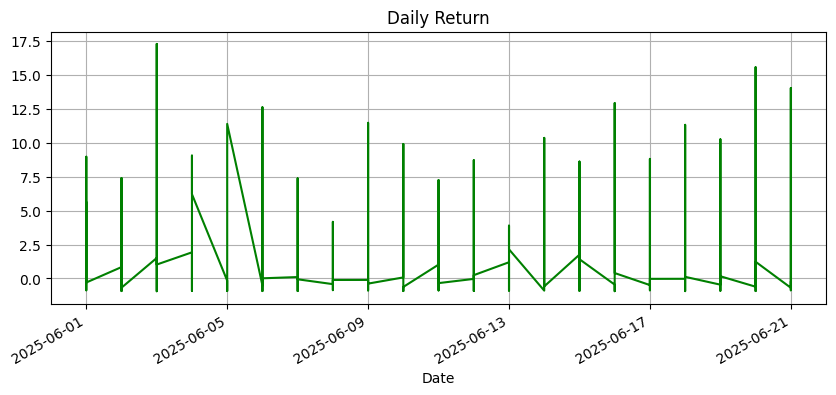

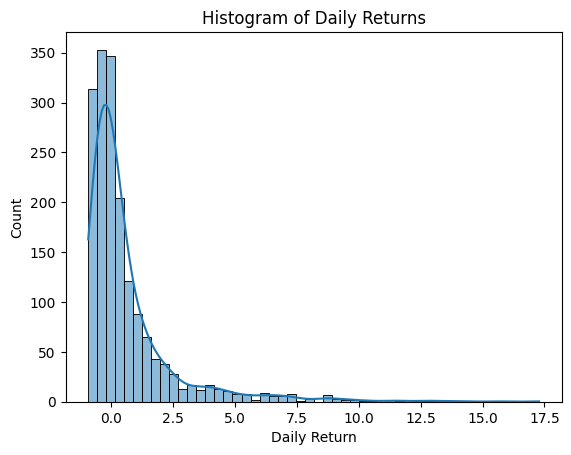

In [14]:
# 7. Daily Returns
if 'Close Price' in df.columns: # Changed from 'Close' to 'Close Price' to match the actual column name
    df['Daily Return'] = df['Close Price'].pct_change() # Changed from 'Close' to 'Close Price' to match the actual column name
    plt.figure(figsize=(10, 4))
    df['Daily Return'].plot(title='Daily Return', color='green')
    plt.grid(True)
    plt.show()
    print('\n')
    # Histogram of returns
    sns.histplot(df['Daily Return'].dropna(), bins=50, kde=True)
    plt.title("Histogram of Daily Returns")
    plt.xlabel("Daily Return")
    plt.show()
else:
    print("The 'Close Price' column is not in the DataFrame.")

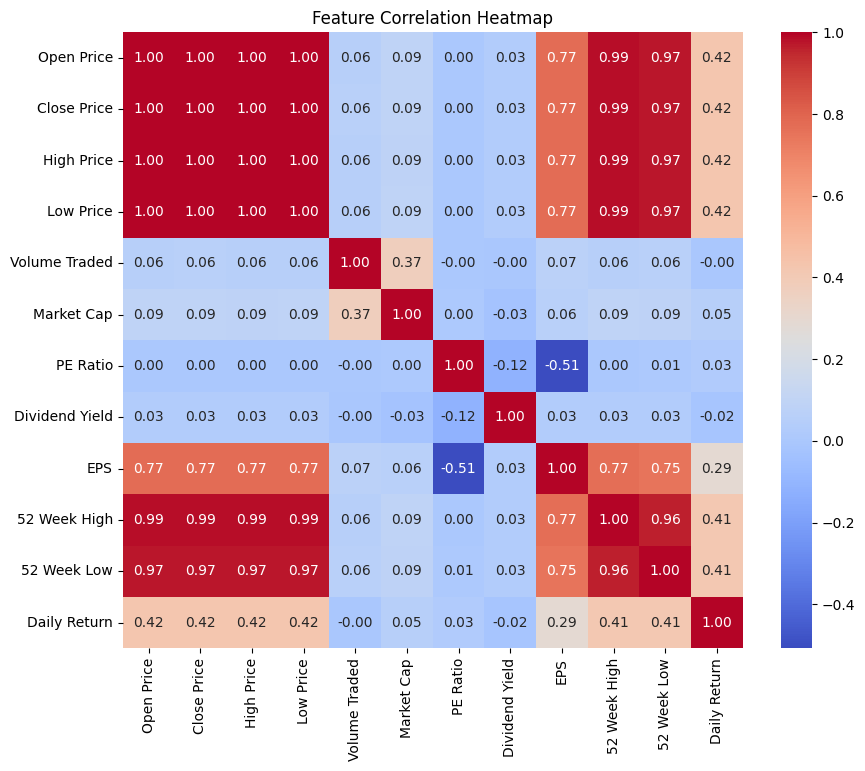

In [16]:
# 8. Correlation Heatmap (if multiple stock features)
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [17]:
# Check top gainers/losers
if 'Daily Return' in df.columns:
    print("\n🔹 Top Gaining Day:")
    print(df['Daily Return'].idxmax(), df['Daily Return'].max())

    print("\n🔹 Top Losing Day:")
    print(df['Daily Return'].idxmin(), df['Daily Return'].min())


🔹 Top Gaining Day:
2025-06-03 00:00:00 17.28658909981629

🔹 Top Losing Day:
2025-06-03 00:00:00 -0.9412094064949608
